### Check numerics

For various intial conditions:
> Those measured in simulation

> Those from simulated transition

In [2]:
from imp import reload
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import sys, os
import time
sys.path.append(os.path.abspath('../presentation')) # include path with style
sys.path.append(os.path.abspath('../simulation/')) # include path with simulation specifications
import pres_style as style; reload(style)
import helper_functions as hf; reload(hf)

# Import specific moduls
import model_class; reload(model_class)

%matplotlib inline

save_fig = True
figure_path = os.path.join(".", "figures")
reverse_order = True # do analysis such that plots resemble those of the paper (starting with L6i)

colors = style.colors

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3.py:215: Warning: Source ID 2 was not found when attempting to remove it
  GLib.source_remove(self._idle_event_id)


In [4]:
def check_solve(model,
               v_guess_0=np.array([ 0.6,  2.5,  4. ,  5.6,  8.2,  8. ,  1.6,  7.6]),
               jacobian=False, root_method='hybr', options=None):
    """Solve for model, given the initial guess v_guess_0.
    Returns solution = v0.
    """
    from scipy.optimize import root, fsolve
    # Instantiation
    if jacobian:
        jac = model.jacobian
    else:
        jac = False

    # Run on initial guess v_guess_0
    sol = root(model.root_v0, v_guess_0, jac=jac, method=root_method, options=options)
    v0  = sol["x"]
    return v0, sol
        

In [127]:
weight_rel_sd   = 0.1
neuron_model    = "iaf_psc_exp"
connection_rule = "fixed_indegree"

model_micro     = model_class.model(neuron_model=neuron_model,
                                    connection_rule=connection_rule, 
                                    weight_rel_sd=weight_rel_sd) 


# Rates from transition
print("Rates from transition")
v_guess_0       = np.array([ 0.6,  2.5,  4. ,  5.6,  8.2,  8. ,  1.6,  7.6])
for jacobian in [False, True]:
    print("Use jacobian:", jacobian)

    #jacobian=False
    root_method='hybr'
    options= {"xtol": 1e-13, "maxfev": 10**4}

    t_int0      = time.time()
    rate_mf, sol = check_solve(model_micro, v_guess_0,
                    jacobian=jacobian, root_method=root_method, options=options)
    t_int1      = time.time() - t_int0

    res_str = "\tt_int: %.2f\t nfev: %i\t success: "%(t_int1, sol["nfev"]) + str(sol["success"])
    print(res_str)
    
print("\nRates from simulation")
for jacobian in [False, True]:
    print("Use jacobian:", jacobian)
    n_success = 0
    n_sims = len(rates_mean_all)
    tints = np.zeros(n_sims)
    nfevs = np.zeros(n_sims) 
    for j in range(n_sims):
        v_guess_0       = rates_mean_all[j]
        
        #jacobian=False
        root_method='hybr'
        options= {"xtol": 1e-13, "maxfev": 10**4}

        t_int0      = time.time()
        rate_mf, sol = check_solve(model_micro, v_guess_0,
                        jacobian=jacobian, root_method=root_method, options=options)
        t_int1      = time.time() - t_int0
        
        res_str = "%i\tt_int: %.2f\t nfev: %i\t success: "%(j, t_int1, sol["nfev"]) + str(sol["success"])
        print(res_str)
        
        n_success += sol["success"]
        tints[j] = t_int1
        nfevs[j] = sol["nfev"]
        
    print(np.mean(tints), np.mean(nfevs))
    print("%i out of %i\n"%(n_success, n_sims))

Rates from transition
Use jacobian: False
	t_int: 0.14	 nfev: 46	 success: True
Use jacobian: True
	t_int: 0.22	 nfev: 79	 success: True

Rates from simulation
Use jacobian: False
0	t_int: 0.11	 nfev: 38	 success: True
1	t_int: 0.26	 nfev: 27	 success: False
2	t_int: 0.17	 nfev: 60	 success: True
3	t_int: 0.12	 nfev: 42	 success: True
4	t_int: 0.25	 nfev: 86	 success: True
5	t_int: 0.13	 nfev: 42	 success: True
6	t_int: 0.11	 nfev: 37	 success: True
7	t_int: 0.13	 nfev: 44	 success: True
8	t_int: 0.14	 nfev: 45	 success: True
9	t_int: 0.13	 nfev: 44	 success: True
10	t_int: 0.12	 nfev: 40	 success: True
11	t_int: 0.14	 nfev: 45	 success: True
12	t_int: 0.21	 nfev: 68	 success: True
13	t_int: 0.17	 nfev: 57	 success: True
14	t_int: 0.11	 nfev: 36	 success: True
15	t_int: 0.13	 nfev: 42	 success: True
16	t_int: 0.13	 nfev: 42	 success: True
17	t_int: 0.11	 nfev: 37	 success: True
18	t_int: 0.12	 nfev: 42	 success: True
19	t_int: 0.11	 nfev: 38	 success: True
0.144635474682 45.6
19 out of

### Compare solver for Brunel and Micro

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


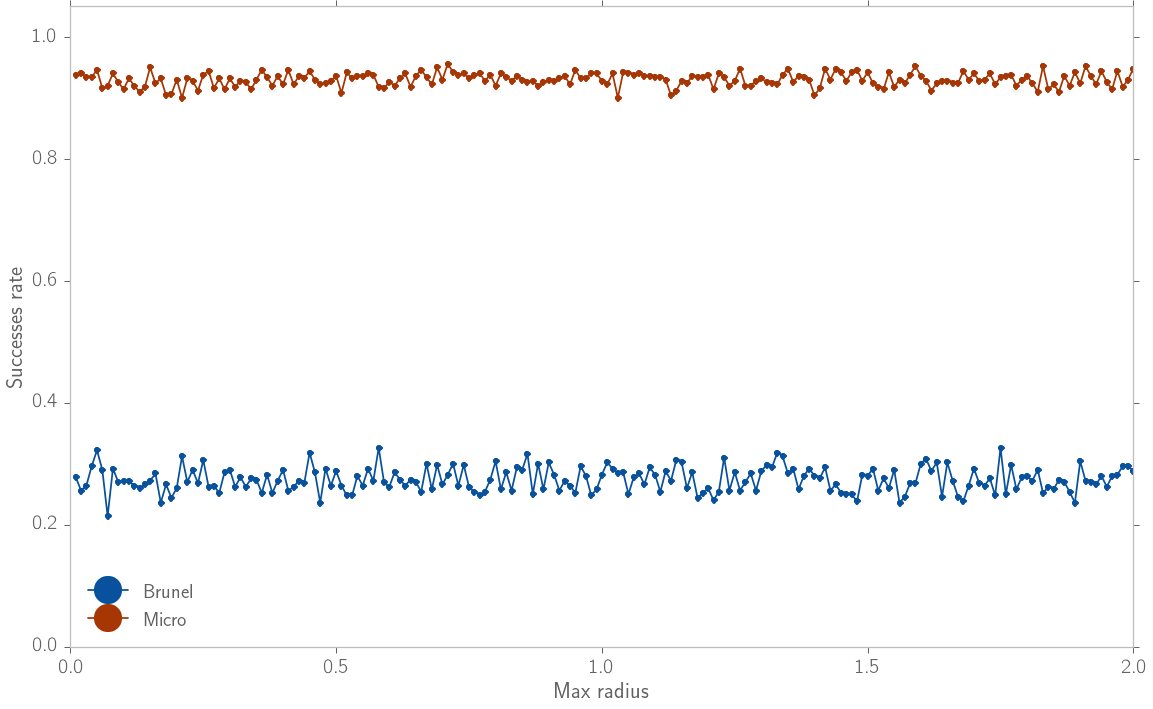

In [5]:
# Microcircuit light:
# only some parameters like Potjans" model
# adapt n_neurons AND C_ab!
j02             = 2.0
weight_rel_sd   = 0.1
n_neurons       = "micro"
C_ab            = "micro"
model_micro       = model_class.model() 
model_names = ["Brunel", "Micro"]

data_path        = "/users/schuessler/uni/microcircuit/analysis"
res_file_name   = "check_numerics.hdf5"
path_res_file   = os.path.join(data_path, res_file_name)
with h5py.File(path_res_file, "r") as  res_file:
    r_max_all     = res_file["r_max_all"][:]
    tints_mean    = res_file["tints_mean"][:]
    nfevs_mean    = res_file["nfevs_mean"][:]
    success_rate  = res_file["success_rate"][:]
    
fig = plt.figure()

ax = hf.add_subplot(fig, n_rows_cols=(1, 1), index_row_col=(0, 0), rowspan=1, colspan=1)
for k, model_name in enumerate(model_names):
    ax.plot(r_max_all, success_rate[k], '-o', color=colors[k*2], label=model_name)
    
ax.set_xlim(0, r_max_all[-1])
ax.set_xlabel("Max radius")
ax.set_ylim(0, 1.05)
ax.set_ylabel("Successes rate")
ax.grid(False)
ax.legend(loc="best")
